<!-- JPN -->
# 記述統計と推測統計

※本演習資料の二次配布・再配布はお断り致します。

<!-- ENG -->
# Descriptive and inferential statistics

※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.

<!-- JPN -->
　今回の演習の内容は以下の通りである。

- **1 | 記述統計**
- **2 | 推測統計**
- **3 | 有意性検定**
- **4 | matplotlibを利用した図の描画**

<!-- ENG -->
The exercises this time are the following.

- **1 | Descriptive statistics**
- **2 | Inferential statistics**
- **3 | Significance test**
- **4 | Drawing diagrams using matplotlib**

<!-- JPN -->
## 1 | 記述統計

<!-- ENG -->
## 1 | Descriptive statistics

<!-- JPN -->
　基盤データサイエンスの講義で、**記述統計 (descriptive statistics) と推測統計 (inferential statistics)** について学び、その中で**標本平均 (sample mean) は不偏推定量 (unbiased estimator) である**一方、**標本分散は不偏推定量ではない**ことを学んだ。

　この節では、**記述統計 (descriptive statistics) ：実際のデータを利用した統計量（標本平均・標本分散）の算出**および、**推測統計 (inferential statistics) ：標本平均・標本分散と母平均・母分散の関係の確認**を行う。


<!-- ENG -->
　In a lecture on Fundamentals of Data Science, you learned about **descriptive statistics and inferential statistics**, in which you learned that **sample mean is an unbiased estimator**, while **sample variance is not an unbiased estimator**.

　In this section, we will learn **descriptive statistics: calculation of statistics (sample mean and sample variance) using actual data**, and **inferential statistics: confirmation of the relationship between sample mean / sample variance and population mean / population variance**.


<!-- JPN -->
### 1.1 | 用語解説


<!-- ENG -->
### 1.1 | Glossary


<!-- JPN -->
　今回は統計の単語を多数利用するので、以下の課題実行の前に少し整理する。

* **母集団 (population)** ：調査対象となる数値、属性等の源泉となる集合全体。確率分布として表現されることが多い。
* **母平均 (population mean)** ：母集団に対する平均。連続確率変数の場合、密度関数 $f(x)$ に対して、$\mu=\int xf(x)dx$ で定義される。離散確率変数の場合も同様。
* **サンプル (sample)** ：（母集団から取り出した）具体的なデータセット。
* **標本平均 (sample mean)** ：具体的なデータセットに対して求めた算術（相加）平均。
* **統計量 (statistic)** ：データセットの特徴を要約した数値。平均や分散は統計量の代表的な例。
* **推定量 (estimator)** ：具体的なデータセットにもとづいて、母集団のパラメータを推定した量。
* **不偏推定量 (unbiased estimator)** ：データ生成に関する期待値が母集団を表す真のパラメータと一致することが保証された推定量。

なお、上記の説明における **データセット** とは、観測されたデータの集合 (List of observed data) であり、複数のデータからなる表形式のものである。



<!-- ENG -->
　Since we will be using a lot of statistical words, we will summarize them before doing the following exercise.

* **Population**\: The entire set that makes up the source of the numeric data, attributes, etc. being studied. It is often expressed as a probability distribution.
* **Population mean**\: The mean for a population. For continuous random variables, it is defined by $\mu=\int xf(x)dx$ for the density function $f(x)$. The same is true for discrete random variables.
* **Sample**\: A specific data set (taken from a population).
* **Sample mean**\: The arithmetic mean obtained for a specific data set.
* **Statistic**\: Numeric values that summarize the characteristics of a data set. Mean and variance are typical examples of statistics.
* **Estimator**\: An estimated quantity of a population parameter based on a specific data set.
* **Unbiased estimator**\: An estimator whose expectations about data generation are guaranteed to match the true parameters representing the population.

In the above explanation, **a data set** is a list of observed data, which is a tabular format consisting of multiple data.



<!-- JPN -->
### 1.2 | データセットの目視

<!-- ENG -->
### 1.2 | Checking the data set

<!-- JPN -->
　今回用いる `iris.csv` データセットはサンプルサイズが150件となっており、十分目視が可能なデータであるため、記述統計の統計量を算出する前に、今回用いるサンプル（データセット）の内容を確認する。

　まずは `iris.csv` をExcelで目視してみよう。（もしExcelが使えない場合は、 `iris.csv` をGoogle Colabにアップロードし、アップロードしたファイルをダブルクリックすることで、ファイルの中身を見ることができる。）

<!-- ENG -->
　The `iris.csv` data set used this time has a sample size of 150, which is sufficiently visible data, so check the content of the sample (data set) used this time before calculating the descriptive statistics.

　First, let's take a look at the `iris.csv` in Excel. (If you don't have access to Excel, you can upload `iris.csv` to Google Colab and double-click on the uploaded file to view its contents.)

![Contents of iris.csv](https://i.imgur.com/ElYyxgN.png)

<!-- JPN -->
　`iris.csv` をExcelで閲覧すると、データはそれぞれ4つの値と1つの名前から構成されていることがまず最初にわかる。
このサンプルをさらに細かく眺めると、例えば以下のようなことがわかる。

* NameはIris-setosa, Iris-versicolor, Iris-virginicaの3種類で、それぞれ50件ずつ存在している。
* PetalWidthに着目してみると、Iris-setosaは必ず1未満だが、その他の2種類は必ず1以上の値になっている。
* 同様に、PetalLengthもIris-setosaだけ値が小さめになっている。
* さらにPetalWidthについてよく見てみると、Iris-versicolorよりもIris-virginicaの方が値が高めになっている。

これらのことを目視で感じたら、次の節に進み、pythonを使って実際に確認してみよう。

<!-- ENG -->
　Browsing `iris.csv` in Excel, we can first see that the data consists of four values and one name, respectively.
A closer look at this sample reveals, for example, the following:

* The Name column has the three names, which are Iris-setosa, Iris-versicolor, and Iris-virginica, and there are 50 of each.
* Looking at PetalWidth, Iris-setosa is always less than 1, but the other two types are always greater than 1.
* Similarly, PetalLength has a smaller value only for Iris-setosa.
* Also, taking a closer look at PetalWidth shows that Iris-virginica has a higher value than Iris-versicolor.

Once you have a visual sense of these features, let's move on to the next section to see them in action using Python.

<!-- JPN -->
### 1.3 | 実際のデータを利用した統計量の算出


<!-- ENG -->
### 1.3 | Calculating statistics using actual data


<!-- JPN -->
#### `pandas`を利用したファイルの読み込みと記述統計量の算出

<!-- ENG -->
#### Reading files and calculating descriptive statistics using `pandas`

<!-- JPN -->
　それでは、先ほどExcelを使って目視したファイルをPythonから読み込んでみよう。
まず、CSVファイル (`iris.csv`) をGoogle Colaboratory上にアップロードせよ（アップロード方法はGoogle Colaboratoryの使い方説明資料に記載されている）。

　つづいて、PythonからCSVファイルを読み込む。CSVファイルの読み込みには、Pythonの `pandas` ライブラリを利用する。
`pandas` は**表形式のサンプルを処理するのに頻出するライブラリ**なので確実に覚えておこう。

<!-- ENG -->
　Now let's read the file we have just looked at using Excel in Python.
First, upload the CSV file (`iris.csv`) to Google Colaboratory (instructions on how to upload are provided in “How to use Google Colaboratory”).

　Next, read the CSV file in Python. To read CSV files, use the `pandas` library in Python.
`pandas` is **a library that is frequently used to process tabular samples**, so let's be sure to learn it.

In [1]:
import pandas as pd       # Prepare the library for use

In [3]:
url= "https://raw.githubusercontent.com/giftedmelon/AdDataSci2023/main/iris.csv"
df = pd.read_csv(url)   # Read the CSV file and name it df
print(df)                          # Try to display the loaded sample (data set) (only a part of it will be displayed)

     SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
print(len(df))                 # Get the sample size (number of data)

150


In [5]:
print(df["Name"])              #  Get only the Name column

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [6]:
print(df[  df["Name"] == "Iris-setosa"  ])   # Get all data whose Name is Iris-setosa

    SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0           5.1         3.5          1.4         0.2  Iris-setosa
1           4.9         3.0          1.4         0.2  Iris-setosa
2           4.7         3.2          1.3         0.2  Iris-setosa
3           4.6         3.1          1.5         0.2  Iris-setosa
4           5.0         3.6          1.4         0.2  Iris-setosa
5           5.4         3.9          1.7         0.4  Iris-setosa
6           4.6         3.4          1.4         0.3  Iris-setosa
7           5.0         3.4          1.5         0.2  Iris-setosa
8           4.4         2.9          1.4         0.2  Iris-setosa
9           4.9         3.1          1.5         0.1  Iris-setosa
10          5.4         3.7          1.5         0.2  Iris-setosa
11          4.8         3.4          1.6         0.2  Iris-setosa
12          4.8         3.0          1.4         0.1  Iris-setosa
13          4.3         3.0          1.1         0.1  Iris-setosa
14        

In [7]:
print(df[  df["SepalWidth"] <= 2.5  ])       # Get all data whose SepalWidth is less than or equal to 2.5

     SepalLength  SepalWidth  PetalLength  PetalWidth             Name
41           4.5         2.3          1.3         0.3      Iris-setosa
53           5.5         2.3          4.0         1.3  Iris-versicolor
57           4.9         2.4          3.3         1.0  Iris-versicolor
60           5.0         2.0          3.5         1.0  Iris-versicolor
62           6.0         2.2          4.0         1.0  Iris-versicolor
68           6.2         2.2          4.5         1.5  Iris-versicolor
69           5.6         2.5          3.9         1.1  Iris-versicolor
72           6.3         2.5          4.9         1.5  Iris-versicolor
80           5.5         2.4          3.8         1.1  Iris-versicolor
81           5.5         2.4          3.7         1.0  Iris-versicolor
87           6.3         2.3          4.4         1.3  Iris-versicolor
89           5.5         2.5          4.0         1.3  Iris-versicolor
93           5.0         2.3          3.3         1.0  Iris-versicolor
98    

In [8]:
print(df["PetalWidth"].mean())           # Get the sample mean of PetalWidth

1.1986666666666668


In [9]:
print(df["PetalWidth"].max())            # Get the maximum value of PetalWidth

2.5


<!-- JPN -->
　以上の関数を利用して、先ほどExcelで目視したことを1つ確かめてみよう。

<!-- ENG -->
　Let's use the above functions to confirm one feature that we have just seen in Excel.

In [10]:
## Fact: Looking at PetalWidth, Iris-setosa is always less than 1
## -> Check the maximum value of PetalWidth for the data where Name==Iris-setosa
setosa = df[df["Name"] == "Iris-setosa"]      # Extract the data with Name==Iris-setosa and save it using a different name
print(setosa["PetalWidth"].max())

0.6


<!-- JPN -->
　上記のコードを実行すると、0.6という出力が得られる。つまり**Iris-setosaのPetalWidthは最大でも0.6**であり、確かに1未満であることが確認できる。このように2段階に分けて（別名保存しながら）処理すると混乱せずに済むので、慣れるまではこのようにすると良いだろう。

<!-- ENG -->
　Executing the above code, we get an output of 0.6. This means that **Iris-setosa's PetalWidth is at most 0.6**, which is certainly less than 1. It is better to process it in two steps like this (while saving with another name) to avoid confusion until you get used to it.

---

<!-- JPN -->
##### 課題 1

　次に示すコードを完成させ、PetalLengthの最小値を取得せよ。


<!-- ENG -->
##### Exercise 1

　Complete the code below to get the minimum value of PetalLength.

In [11]:
# CODE CELL FOR YOUR ANSWER
min_length = df["PetalLength"].min()
print(min_length)

1.0


-------

<!-- JPN -->
## 2 | 推測統計

　これまでの記述統計では、既にあるサンプルの様々な値を確認したり、サンプルをまとめて表現するような値（標本平均、最小値など）を計算した。
一方、推測統計では、**手元にあるサンプル（データセット）は母集団 (population) から無作為に取り出された「母集団の部分集合」である**という考え方に基づいて、サンプルから、母集団の平均や分散などの性質を明らかにすることを目的としている。

<!-- ENG -->
## 2 | Inferential statistics

　Descriptive statistics involves checking various values of an already existing sample, or calculating values (sample mean, minimum value, etc.) that would represent the sample as a whole.
Inferential statistics, on the other hand, is based on the idea that **the sample (data set) you have is a "subset of the population" taken at random from the population**, and aims to clarify properties such as the mean and variance of the population from the sample.

<!-- JPN -->
　言葉だけではわかりにくいと思うので、実際に計算を行ってみよう。
以下のコードは、**平均5、分散1の正規分布**から10件のデータ（これが1つのサンプルに対応する）を発生させ、標本平均 (sample mean) および標本分散 (sample variance) を計算している。

<!-- ENG -->
　I think it's hard to understand with just talking about it, so let's do some actual calculations.
The following code generates 10 cases of data (which corresponds to one sample) from **a normal distribution with mean 5 and variance 1**, and calculates sample mean and sample variance.

In [12]:
import random

# Generate a single sample consisting of n data
def gen_sample(n):
    sample = []
    for i in range(n):
        sample.append(random.gauss(5,1))
    return sample

<!-- JPN -->
　次のコードは、10件のデータからなるサンプルの標本平均および標本分散を計算するコードである。実行毎に結果は変化するので、何度も実行してみてほしい。

<!-- ENG -->
　The following code calculates the sample mean and sample variance for a sample consisting of 10 data points. The results will change each time you run it, so please run it several times.

In [22]:
import statistics
a_sample = gen_sample(10)
print(a_sample)
print(statistics.mean(a_sample))
print(statistics.pvariance(a_sample)) # Calculate the sample variance

[5.154510018455567, 4.604262696384033, 4.672686429869325, 5.747474055480219, 5.426336050511788, 6.864264255552703, 4.650175507442984, 4.766886207083883, 3.7153626686293286, 4.571112138650851]
5.017307002806068
0.6511538401924599


<!-- JPN -->
　資料作成の時には、5回実行してみると、標本平均が4.55～5.66、標本分散が0.74～1.07という結果が得られた。かなりばらつきがあるようだ。

　さて、この標本平均および標本分散の期待値（平均値）はいくらになるだろうか。沢山のサンプルを発生させ、標本平均と標本分散を毎回計算し、その平均値を求めてみることにする。

<!-- ENG -->
　Upon creating this document, and executing it 5 times, the results were obtained where the sample mean was between 4.55 to 5.66 and the sample variance was between 0.74 to 1.07. There seems to be a lot of variation.

　Now, what will be the expected value (mean) of this sample mean and sample variance? We'll generate a lot of samples and calculate the sample mean and sample variance each time, and then try to find the mean.

In [23]:
sample_means = []
for i in range(10000):
    sample = gen_sample(10)
    sample_mean = statistics.mean(sample)
    sample_means.append(sample_mean)
print(statistics.mean(sample_means))

4.996473823980698


In [15]:
sample_variances = []
for i in range(10000):
    sample = gen_sample(10)
    sample_variance = statistics.pvariance(sample)
    sample_variances.append(sample_variance)
print(statistics.mean(sample_variances))

0.9034220926558261


<!-- JPN -->
　どうやら、標本平均の期待値（平均値）は5.0、標本分散の期待値（平均値）は0.9程度のようである。
ここで、元の分布の**分散は1**だったにも関わらず、**標本分散の平均値が0.9**であることに注意してほしい。すなわち、標本分散の期待値（平均値）は母分散（population variance, 元の分布の分散）とは一致しない（つまり、**標本分散は分散の不偏推定量 (unbiased estimator) ではない**）。

<!-- ENG -->
　Apparently, the expected value (mean) of the sample mean is about 5.0 and the expected value (mean) of the sample variance is about 0.9.
Here, although **the variance of the original distribution was 1**, note that **the mean of the sample variance is 0.9**. In other words, the expected value of the sample variance (mean) does not match the population variance (the variance of the original distribution) (i.e., **the sample variance is not an unbiased estimator of the variance**).

---------


<!-- JPN -->
##### 課題 2
　上記の検証ではサンプル数（サンプルサイズではない）を10,000にしていた。このサンプル数を100にした時、100,000にした時に、どのような変化が生じるだろうか。以下の2点について答えよ。（最大で30秒程度の計算時間を要する）
* 出力される標本平均・標本分散の精度（期待される値にどれほど近いか。定性的な評価でかまわない）
* 値が表示されるまでにかかった時間とサンプル数との関係（**Google Colaboratory上で計測**せよ）

　なお、計算時間の計測に関しては以下のコードを利用せよ。

<!-- ENG -->
##### Exercise 2
　In the above verification, the number of samples (not the sample size) was set to 10,000. What changes will occur when the number of samples is changed to 100 or 100,000? Answer the following two questions. (It takes up to 30 seconds to calculate.)
* The accuracy of the output sample mean and sample variance (how close they are to the expected values. A qualitative assessment is fine.)
* Relationship between the number of samples and the time it took for the values to be displayed. (**measure on Google Colaboratory**)

　For measuring the computational time, use the following code.

In [25]:
import time
time_start = time.time() # Get the current time
sample_means = []
sample_variances = []

for i in range(10000):
  sample = gen_sample(10)
  # CALC SOMETHING
  sample_mean = statistics.mean(sample)
  sample_means.append(sample_mean)
  sample_variance = statistics.pvariance(sample)
  sample_variances.append(sample_variance)
time_end = time.time() # Get the current time
print(time_end - time_start) # Calculate the difference between the start time and end time (in seconds)
print(statistics.mean(sample_means))
print(statistics.mean(sample_variances))

1.2420930862426758
5.002600348570532
0.8968515737636389


In [26]:
import time
time_start = time.time() # Get the current time
sample_means = []
sample_variances = []

for i in range(100):
  sample = gen_sample(10)
  # CALC SOMETHING
  sample_mean = statistics.mean(sample)
  sample_means.append(sample_mean)
  sample_variance = statistics.pvariance(sample)
  sample_variances.append(sample_variance)
time_end = time.time() # Get the current time
print(time_end - time_start) # Calculate the difference between the start time and end time (in seconds)
print(statistics.mean(sample_means))
print(statistics.mean(sample_variances))

0.02177262306213379
5.047307212611117
0.9481211551466069


In [27]:
import time
time_start = time.time() # Get the current time
sample_means = []
sample_variances = []

for i in range(100000):
  sample = gen_sample(10)
  # CALC SOMETHING
  sample_mean = statistics.mean(sample)
  sample_means.append(sample_mean)
  sample_variance = statistics.pvariance(sample)
  sample_variances.append(sample_variance)
time_end = time.time() # Get the current time
print(time_end - time_start) # Calculate the difference between the start time and end time (in seconds)
print(statistics.mean(sample_means))
print(statistics.mean(sample_variances))

13.355163812637329
4.998544966392361
0.897712266169757


<!-- JPN -->
<font color=orange> **このテキストセルに答案を記述せよ。** </font>

<!-- ENG -->
<font color=orange> **Write your answer in this text cell.** </font>

　When the number of samples is changed to 100, the expected value (mean) of the sample mean is about 5.05 and the expected value (mean) of the sample variance is about 0.95. The executed time is about 0.02s. So, the expected value of the sample mean (mean) and the sample variance (mean) all does not match the population mean and variance (the variance of the original distribution).

　For better comparsion and recording the time, I executed again, when the number of samples is 10000. The expected value (mean) of the sample mean is about 5.00 and the expected value (mean) of the sample variance is about 0.9. The executed time is about 1.24s. So, the expected value of the sample variance (mean) does not match the population variance (the variance of the original distribution).

　And when the number of samples is changed to 100000, the expected value (mean) of the sample mean is about 5.00 and the expected value (mean) of the sample variance is about 0.9. The executed time is about 13.36s. So, the expected value of the sample variance (mean) does not match the population variance (the variance of the original distribution)

　So, the time it took is going increased with the bigger number of samples.

---

<!-- JPN -->
##### 課題 3

　`statistics.pvariance(sample)`は与えられたサンプルの標本分散 (sample variance) を求める関数であった。同様に、不偏推定量である不偏分散（unbiased variance）を求める関数が`statistics`に存在している。Google検索などを行い、不偏分散を求める関数の名前を答えよ。
ただし、例えば**Pythonの公式ドキュメントは母分散、標本分散などの単語を一部誤用している**ため、分散の定義や注釈なども読む必要があることに注意せよ。

　すぐに見つけられた受講生向け（採点対象外）：上記のコードを修正して、不偏分散の期待値（平均値）を計算し、不偏分散の平均値が母分散 (population variance) である1.0に漸近することを確認せよ。

<!-- ENG -->
##### Exercise 3
　As we know, `statistics.pvariance(sample)` is function to find the sample variance for a given sample. The `statistics` library also has a function to find the unbiased variance, which is an unbiased estimator. Do a Google search, etc., and answer the name of the function for finding the unbiased variance.
Note, however, that **the official Python documentation, for example, misuses some words such as population variance, sample variance, and so on**, so you need to read the definition of variance and the annotations.

　For students who can find it quickly (not to be graded): Revise the above code to calculate the expected value (mean) of the unbiased variance and make sure that the mean value of the unbiased variance approaches 1.0, which is the population variance.

<!-- JPN -->
<font color=orange> **このテキストセルに答案を記述せよ。** </font>

<!-- ENG -->
<font color=orange> **Write your answer in this text cell.** </font>

The function in the statistics library to find the unbiased variance is **statistics.variance(sample)**. This function calculates the sample variance using Bessel's correction, which provides an unbiased estimate of the population variance when dealing with a sample.

Here's the modified code to calculate the mean (mean) and expected value (mean) of the unbiased variance which approaches 1, the same as the population variance:

In [28]:
import time
import statistics

time_start = time.time() # Get the current time
sample_means = []
sample_unbiased_variances = []

for i in range(10000):
  sample = gen_sample(10)
  # CALCULATE SOMETHING
  sample_mean = statistics.mean(sample)
  sample_means.append(sample_mean)
  sample_unbiased_variance = statistics.variance(sample)
  sample_unbiased_variances.append(sample_unbiased_variance)

time_end = time.time() # Get the current time
print(time_end - time_start) # Calculate the difference between the start time and end time (in seconds)
print(statistics.mean(sample_means))
print(statistics.mean(sample_unbiased_variances))

1.267066240310669
4.995879490004212
0.9994737109096282


-------

<!-- JPN -->

# 3 | 有意性検定

1袋100gと記載されたポテトチップスを考えよう。このポテトチップスを5袋買ったところ、95g, 98g, 102g, 90g, 94gであった。さて、本当にこのポテトチップスは100g詰めるように製造されているのだろうか？

<!-- ENG -->
# 3 | Significance Test

Consider a bag of chips labeled 100g. When we buy 5 bags of these chips, they are 95g, 98g, 102g, 90g, and 94g. Now, are these chips really manufactured to pack 100g?

<!-- JPN -->
有意性検定とは、得られたサンプル（95g, 98g, 102g, 90g, 94g）をもとに母集団に対する疑わしい仮説（1袋100gは本当か？）を確率的に検証する手法であり、以下の手順で実施される。

<!-- ENG -->
Significance test is a method of probabilistically testing a suspect hypothesis for a population (are they manufactured to pack 100g?) based on the obtained sample (95g, 98g, 102g, 90g, and 94g), and is performed by the following steps.

<!-- JPN -->
1. 帰無仮説 $H_0$ を設定する。「**1袋あたり平均100gのポテトチップスが入れられている**」
2. 有意水準 $\alpha$ を決定する。「**5% ($\alpha=0.05$) 以上の確率で1袋あたり100gのポテトチップスが入っていると言えるか？**」
3. P値を算出し、帰無仮説 $H_0$ が正しいか否かを判定する。「**計算してみたら10%くらいの確率で1袋100gと言えるので、間違っていなさそうだ**」

<!-- ENG -->
1. Set up the null hypothesis $H_0$. "**Each bag of chips contains 100g on average**"
2. Determine the significance level $\alpha$. "**Can we conclude these bags contains 100g on average with probability of 5% ($\alpha=0.05$) or more?**"
3. Calculate the P-value and determine whether the null hypothesis $H_0$ is significant. "**The statistical test indicates each bag of chips contains 100g with probability of 10%, thus the hypothesis is not wrong.**"

<!-- JPN -->
　有意性検定の例として、有意水準 $\alpha = 0.05$ として、「Irisデータセットの `PetalWidth` の母平均は1.5と言えるだろうか？」という仮説の検定を行ってみよう。
この時、**この仮説が正しいと言える確率が0.05を下回る場合**は帰無仮説 $H_0$ が棄却され、**`PetalWidth`の平均は1.5ではない**と言える。

<!-- ENG -->
　As an example of a significance test, let's try testing a null hypothesis "Can we conclude the population mean of `PetalWidth` is 1.5?" with a significance level of $\alpha = 0.05$.
If **a probability of a null hypothesis is less than 0.05**, the null hypothesis is rejected, and we conclude **the population mean of `PetalWidth` is not 1.5**.

<!-- JPN -->
　このような検定のことを「1標本のt検定」などと呼び、Pythonでは `Scipy.stats.ttest_1samp()` 関数で実行することができる。

<!-- ENG -->
　This significance test is called as "one-sample t-test". We can execute it with `Scipy.stats.ttest_1samp()` function.

In [30]:
import pandas as pd
df = pd.read_csv(url)
print(df)

     SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


In [31]:
from scipy import stats

alpha = 0.05
t, p = stats.ttest_1samp(df["PetalWidth"], 1.5)

if alpha >= p:
    print(f"H_0 is rejected. (alpha={alpha}, p-value={p})")
else:
    print(f"H_0 is not rejected. (alpha={alpha}, p-value={p})")

H_0 is rejected. (alpha=0.05, p-value=3.2709242729873713e-06)


<!-- JPN -->
`scipy.stats.ttest_1samp()` 関数の返り値は `(t値, p値)` のタプルがである。p値が帰無仮説 $H_0$ が正しい確率 (probability value) であるが、結果は $p = 3.27 \times 10^{-6}$ と極めて低い。すなわち、帰無仮説「Irisデータセットの `PetalWidth` の母平均は1.5と言えるだろうか？」は棄却され、「Irisデータセットの `PetalWidth` の母平均は1.5**ではない**」という結論を得た。

<!-- ENG -->
The return value of `scipy.stats.ttest_1samp()` is a tuple of (t-value, p-value). p-value represents the probability which the null hypothesis $H_0$ is true. The result was $p = 3.27 \times 10^{-6}$, which is smaller than the pre-determined significance level. Therefore, the null hypothesis $H_0$, "Can we conclude the population mean of `PetalWidth` is 1.5?" was rejected and we can conclude "the population mean of `PetalWidth` **is not** 1.5`".

-------

<!-- JPN -->
## 4 | matplotlibを利用した図の描画

　これまではひたすら数値を抜き出して表示させたり、あるいは平均値や最小値、最大値、分散などの値を計算していた。一方、沢山のデータの傾向を眺めるのに図を作成することは非常に効果的である。
ここでは、matplotlibという別のライブラリを利用して、図の作成を行ってみる。matplotlibを使うと、ヒストグラムや箱ひげ図 (box plot) を簡単に作成することができる。


<!-- ENG -->
　Until now, numerical values ​​have been extracted and displayed, or values ​​such as mean value, minimum value, maximum value, and variance have been calculated. On the other hand, it is very effective to create a diagram to see large data trends.
Here, we will try to create a diagram using another library called matplotlib. Using matplotlib, it is easy to create diagrams such as histograms and box plots.


![ヒストグラムの例](https://i.imgur.com/YviFPUt.png)


![箱ひげ図の例](https://i.imgur.com/xYREV5t.png)

<!-- JPN -->
### 4.1 | matplotlibの利用準備
　まず、新しいライブラリを使う準備を行う。`pandas`でやった時と同じように`import`文を実行する。

<!-- ENG -->
### 4.1 | Preparing to use matplotlib
　The first step is to prepare to use the new library. Execute the `import` statement in the same way as you did with `pandas`.

In [32]:
import matplotlib.pyplot as plt

<!-- JPN -->
　また、先ほどと同様のirisのデータセットを用いるため、準備を行う。
もしフォルダから `iris.csv` が消去されてしまっていたら、再度アップロードの作業を行った上で、以下のコードを実行する。

<!-- ENG -->
　We will also prepare to use the same iris data set as before.
If `iris.csv` has been erased from the folder, perform the upload process again, and then run the following code.

In [34]:
import pandas as pd
ddf = pd.read_csv(url) # Read the CSV

<!-- JPN -->
### 4.2 | ヒストグラムの描画

<!-- ENG -->
### 4.2 | Drawing a histogram

<!-- JPN -->
　`matplotlib`を使って早速ヒストグラムを描画してみよう。
最も単純には、以下のコードで書くことができる。

<!-- ENG -->
　Let's try to draw a histogram using `matplotlib`.
At its simplest, a histogram can be written with the following code.

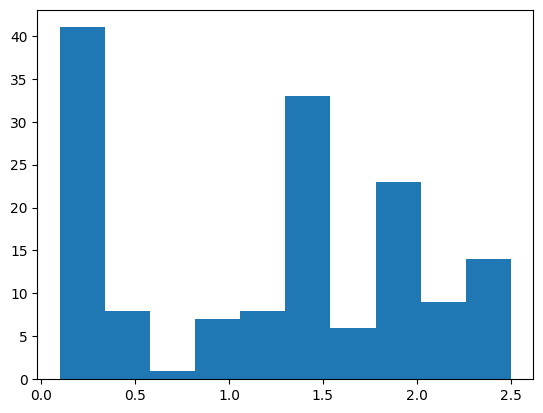

In [35]:
plt.hist(df["PetalWidth"]) # Enter the data for which you want to draw a histogram in the argument
                           # of the function hist() that writes the histogram.
plt.show()                 # Use show() to display the figure instead of print()

<!-- JPN -->
　上記のコードでは、$x$ 軸や $y$ 軸がどういう値か図に示されていない。これを図に含めるためには、`plt.xlabel()`、`plt.ylabel()`を使えば良い。

<!-- ENG -->
　In the above code, the figure does not show what values the $x$-axis and $y$-axis have. To include this in the diagram, you can use `plt.xlabel()` and `plt.ylabel()`.

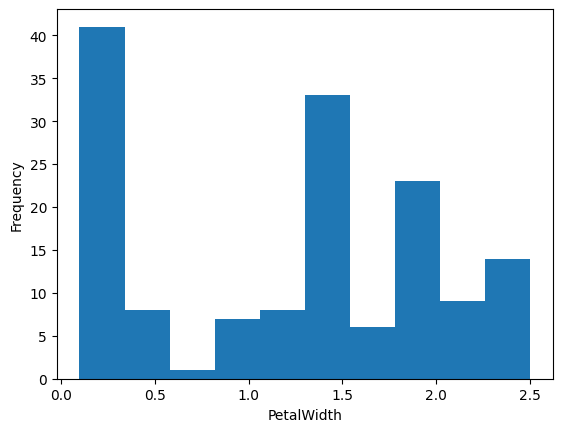

In [36]:
plt.hist(df["PetalWidth"])
plt.xlabel("PetalWidth")   # Explanation of the x-axis
plt.ylabel("Frequency")    # Explanation of the y-axis
plt.show()

<!-- JPN -->
　matplotlibで作成した図は、画像（png等）やPDFで保存することができる。この場合は、`plt.show()`関数の代わりに`plt.savefig(filename)`で保存する。

<!-- ENG -->
　Diagrams created with matplotlib can be saved as images (png, etc.) or PDFs. In this case, instead of the `plt.show()` function, save the file using `plt.savefig(filename)`.

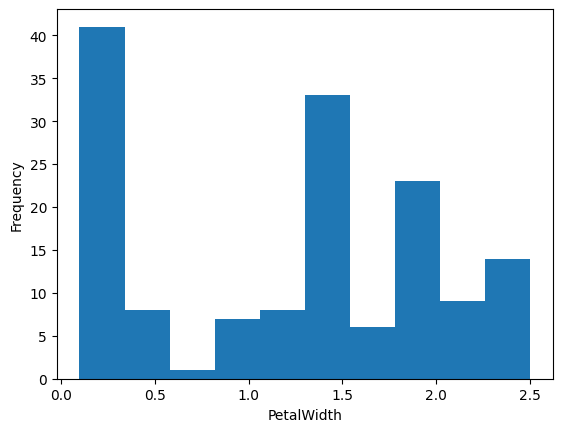

In [37]:
plt.hist(df["PetalWidth"])
plt.xlabel("PetalWidth")   # Explanation of the x-axis
plt.ylabel("Frequency")    # Explanation of the y-axis
plt.savefig("histogram_pWidth.png") # Depending on the extension, a PDF is generated or an image is generated
### In the case of Google Colab, it will also appear on the screen.

<!-- JPN -->
　作成したファイルは、csvファイルをアップロードした場所に表示される。もし表示されない場合は、「アップロード」ボタンの隣にある「更新」をクリックすれば表示されるはずである。

<!-- ENG -->
　The file you created will be displayed in the location where you uploaded the csv file. If you don't see it, click "Refresh" next to the "Upload" button and it should appear.

<!-- JPN -->
　なお、`plt.savefig()` と `plt.show()` はどちらか片方のみ使うように注意してほしい。特に、 `plt.show()` の後に `plt.savefig()` しても、何も描画されていない画像ファイルが生成される。

<!-- ENG -->
　Note that only one of `plt.savefig()` and `plt.show()` should be used. In particular, `plt.show()` followed by `plt.savefig()` produces an image file with no drawing.

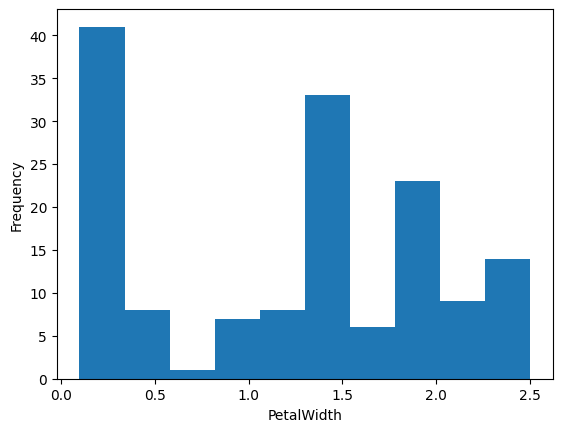

<Figure size 640x480 with 0 Axes>

In [38]:
# figure will be correctly saved, but nothing is shown.

plt.hist(df["PetalWidth"])
plt.xlabel("PetalWidth")
plt.ylabel("Frequency")

plt.show()
plt.savefig("nothing.png")


<!-- JPN -->
### 4.3 | 箱ひげ図 (boxplot) の描画

<!-- ENG -->
### 4.3 | Drawing a boxplot

<!-- JPN -->
　箱ひげ図 (boxplot) は、以下の情報を一度に表示することで、データセットの分布の概形を知ることができるものである。

* （外れ値を除いた）最大値　　　　：最上部の横線
* 75パーセンタイル（第三四分位数）：箱の上面
* 50パーセンタイル（中央値）　　　：箱内部の赤線
* 25パーセンタイル（第一四分位数）：箱の下面
* （外れ値を除いた）最小値　　　　：最下部の横線
* 外れ値　　　　　　　　　　　　　：丸点

<!-- ENG -->
　Boxplot is a way to get a rough idea of the distribution of a data set by displaying the following information all at one time.

* Maximum value (excluding outliers)　 : Horizontal line at the top
* 75th percentile (third quartile)　　　　: Top of the box
* 50th percentile (median)　　　　　　: Red line inside the box
* 25th percentile (first quartile)　　　　: Underside of the box
* Minimum value (excluding outliers)　: Horizontal line at the bottom
* Outlier　　　　　　　　　　　　　　: Circle(s)

<!-- JPN -->
　それでは、Iris-setosaのPetalWidthについて、箱ひげ図を描画してみる。最も単純には、以下のコードで箱ひげ図を作成することができる。



<!-- ENG -->
　Now, let's draw a boxplot for the PedalWidth of Iris-setosa. At its simplest, the following code can be used to create a boxplot diagram.



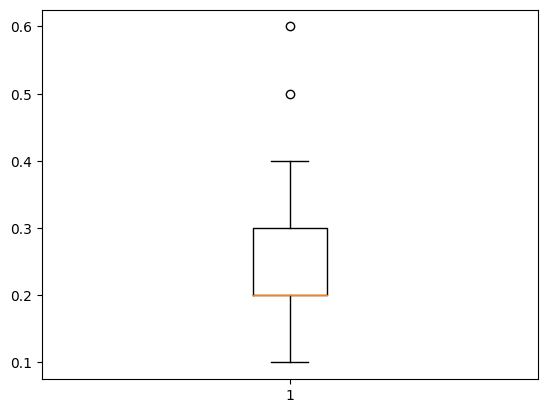

In [39]:
setosa = df[df["Name"] == "Iris-setosa"]
plt.boxplot(setosa["PetalWidth"])
plt.show()

<!-- JPN -->
　この場合は、第一四分位数と中央値が一致しているため、箱の下面が赤線になっている。

<!-- ENG -->
　In this case, the first quartile and the median are the same, so the bottom of the box has a red line.

<!-- JPN -->
　次に、少し複雑な箱ひげ図を作成してみよう。Iris-setosa, Iris-versicolor, Iris-virginicaのそれぞれのPetalWidthの箱ひげ図を、同じグラフで表示する。複数のデータを入力するときは、`plt.boxplot()`に**配列として**与える。

<!-- ENG -->
　Next, let's create a slightly more complex boxplot diagram. The boxplot of PedalWidth for Iris-setosa, Iris-versicolor, and Iris-virginica, respectively, are displayed in the same graph. When inputting multiple data, give them to `plt.boxplot()` **as an array**.

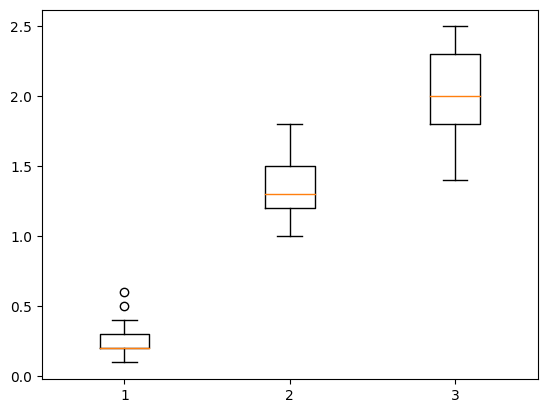

In [40]:
setosa = df[df["Name"] == "Iris-setosa"]
versicolor = df[df["Name"] == "Iris-versicolor"]
virginica = df[df["Name"] == "Iris-virginica"]

plt.boxplot([setosa["PetalWidth"], versicolor["PetalWidth"], virginica["PetalWidth"]]) # Gather multiple inputs into an array
plt.show()

<!-- JPN -->
　ところで、1, 2, 3ではどれがどのデータだかわからない。ここに"Iris-setosa"などと表示させたい場合には、
`plt.boxplot()`関数の`labels`引数を用いる。

<!-- ENG -->
　By the way, we don't know which data is which as it is shown as 1, 2, and 3. If you want to display such as "Iris-setosa" here, you can use the `labels` argument of the `plt.boxplot()` function.

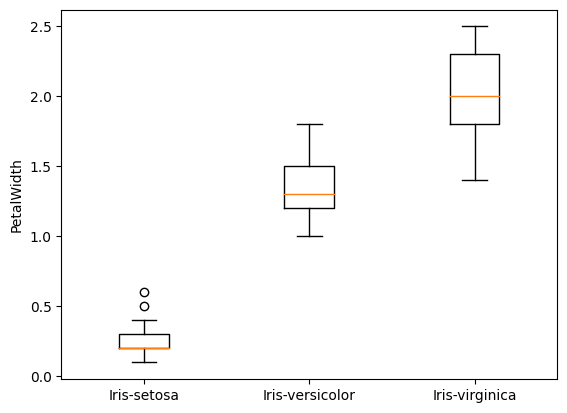

In [41]:
setosa = df[df["Name"] == "Iris-setosa"]
versicolor = df[df["Name"] == "Iris-versicolor"]
virginica = df[df["Name"] == "Iris-virginica"]

plt.boxplot([setosa["PetalWidth"], versicolor["PetalWidth"], virginica["PetalWidth"]],
            labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.ylabel("PetalWidth")
plt.show()

<!-- JPN -->
### 4.4 | 散布図の描画

<!-- ENG -->
### 4.4 | Drawing a scatter plot

<!-- JPN -->
　さらに、散布図 (scatter plot) を作成してみる。散布図は二つの変数の関係を見る際に非常に有用である。

<!-- ENG -->
　Next, we will try creating a scatter plot. Scatter plots are very useful in looking at the relationship between two variables.

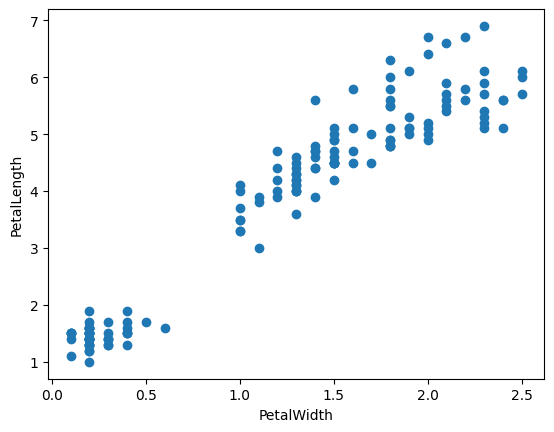

In [42]:
plt.scatter(df["PetalWidth"], df["PetalLength"])
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")

plt.show()

<!-- JPN -->
　散布図では、凡例を記述することができる。

<!-- ENG -->
　In a scatter plot, a legend can be displayed.

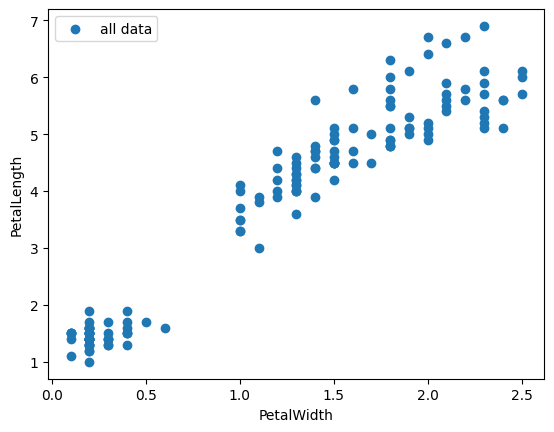

In [43]:
plt.scatter(df["PetalWidth"], df["PetalLength"], label="all data") #  The label is set to be displayed in the legend
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.legend() # Display a legend

plt.show()

---

<!-- JPN -->
##### 課題 4

　下図のように、図の上部にタイトルを付けたい。Google検索などを駆使して、実際に図を作成し、 `scatter_plot_with_title.svg` としてファイルに保存するプログラムを作成せよ。

<!-- ENG -->
##### Exercise 4

　Add a title to the top of the figure, as shown below. Making full use of Google search, etc., implement a code to create the figure and save as `scatter_plot_with_title.svg`.

![図2.4](https://i.imgur.com/m6vQ6sV.png)


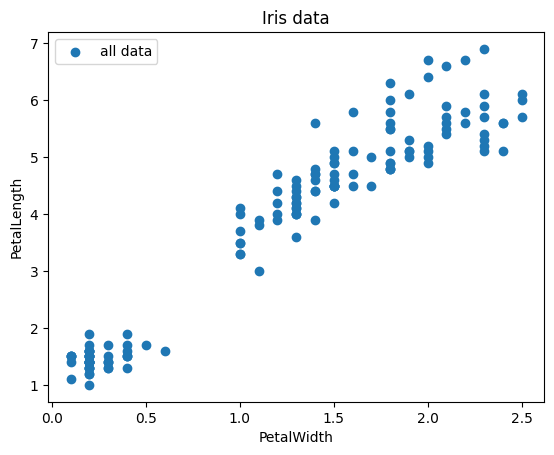

In [52]:
# CODE CELL FOR YOUR ANSWER
...
plt.scatter(df["PetalWidth"], df["PetalLength"], label="all data") #  The label is set to be displayed in the legend
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.legend() # Display a legend

plt.title("Iris data")
plt.savefig("scatter_plot_with_title.svg")
plt.show()

---

<!-- JPN -->
##### 課題 5（発展）
　箱ひげ図同様に、散布図でもsetosa, versicolor, virginicaの区別をつけて描画してみたい。凡例を付けて、3種類のデータが区別できるように散布図を描画するコードを作成し、 `scatter_plot_with_title_and_legend.svg` を出力せよ。

<!-- ENG -->
##### Exercise 5 (Advanced)
　As with the boxplot, implement a code to draw the scatter plot showing the distinction between setosa, versicolor, and virginica. Also display a legend in a scatter plot so that the three types of data can be distinguished. Save the figure as `scatter_plot_with_title_and_legend.svg`.

![図2.5](https://i.imgur.com/ep8wlSh.png)

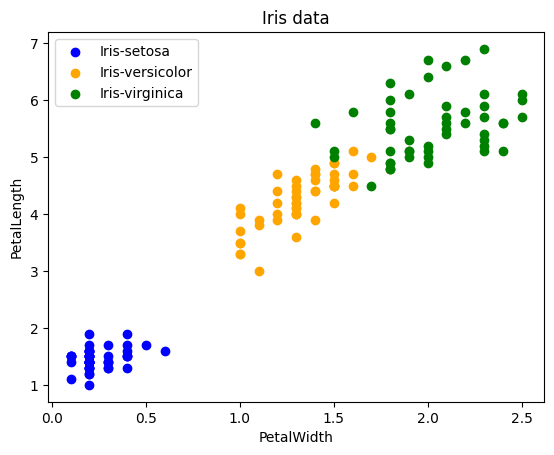

In [51]:
# CODE CELL FOR YOUR ANSWER
...
setosa = df[df["Name"] == "Iris-setosa"]
versicolor = df[df["Name"] == "Iris-versicolor"]
virginica = df[df["Name"] == "Iris-virginica"]

# Create scatter plots for each category
plt.scatter(setosa["PetalWidth"], setosa["PetalLength"], label='Iris-setosa', color='blue')
plt.scatter(versicolor["PetalWidth"], versicolor["PetalLength"], label='Iris-versicolor', color='orange')
plt.scatter(virginica["PetalWidth"], virginica["PetalLength"], label='Iris-virginica', color='green')

plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.legend() # Display a legend

plt.title("Iris data")
plt.savefig("scatter_plot_with_title_and_legend.svg")
plt.show()

---

<!-- JPN -->
# 補足資料

## ※1：matplotlibで作れる様々な図

matplotlibは他にも様々な図、あるいは複雑な図を作成することが可能である。[matplotlibのチュートリアル](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)など、参考にしてほしい。


<!-- ENG -->
# Supplementary Material

## S1: Various diagrams that can be created with matplotlib

matplotlib is capable of creating various other diagrams, or complex diagrams. Please refer to the [matplotlib tutorials](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) and other resources.
